<div align='center'><h1 style='color:red'>Flower Classification</h1>

<div class='alert alert-info'><i><h3>This Jupyter Notebook explores a synthetic dataset containing information about roses, shoeblack plants, and hibiscus. The dataset provides a simulated representation of real-world flower data, including attributes such as species, size, fragrance, and height.<hr>The primary objective of this project is to conduct exploratory Data Analysis (EDA), Data Visualization and potentially develop predictive models based on the given dataset. By understanding the underlying patterns and relationships within the data, I aim to gain insights into the characteristics of these flowers and potentially identify trends or correlations between different attributes.<hr>This notebook will involve data cleaning, visualization, statistical analysis, and potentially machine learning modeling to achieve these goals.<hr>I built three models namely Support Vector Classifier, Logistic Regression Model and K Nearest Neighbors Classifier Model.<hr>Explore the notebook further to find out which model performs best.

![](https://storage.googleapis.com/kaggle-datasets-images/5445916/9034652/a0f380e03acb3039acf07fdc4a02b460/dataset-cover.png?t=2024-07-25-18-31-45)

## For Kaggle Dataset : [Click here](https://www.kaggle.com/datasets/abhayayare/flower-dataset)

## Importing Libraries
#### We will import the essential libraries for this task here. Additional libraries may be imported as needed throughout the notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset into a DataFrame

In [2]:
df=pd.read_csv("flower_dataset.csv")

In [3]:
df.head()

,species,size,fragrance,height_cm
0,rose,medium,mild,48.55
1,shoeblack plant,medium,mild,147.07
2,shoeblack plant,medium,none,102.93
3,hibiscus,large,none,184.00
4,shoeblack plant,large,mild,83.07


In [4]:
df.shape

(10000, 4)

### Performing Exploratory Data Analysis

In [5]:
df.describe()

,height_cm
count,10000.000000
mean,104.873938
std,43.635191
min,30.090000
25%,69.307500
50%,100.510000
75%,137.022500
max,199.970000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    10000 non-null  object 
 1   size       10000 non-null  object 
 2   fragrance  10000 non-null  object 
 3   height_cm  10000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


In [7]:
df.isnull().sum()

species      0
size         0
fragrance    0
height_cm    0
dtype: int64

In [8]:
df.dtypes

species       object
size          object
fragrance     object
height_cm    float64
dtype: object

In [9]:
print(df['species'].unique(),"\n")
print(df['size'].unique(),"\n")
print(df['fragrance'].unique(),"\n")

['rose' 'shoeblack plant' 'hibiscus'] 

['medium' 'large' 'small'] 

['mild' 'none' 'strong'] 



#### Converting categorical variables of species column to numerical variables

In [10]:
final_df=df.replace({'large':3,'medium':2,'small':1,'strong':1,'mild':2,'none':3,'hibiscus':3,'rose':2,'shoeblack plant':1})
final_df.head()

,species,size,fragrance,height_cm
0,2,2,2,48.55
1,1,2,2,147.07
2,1,2,3,102.93
3,3,3,3,184.00
4,1,3,2,83.07


### Performing Data Visualization

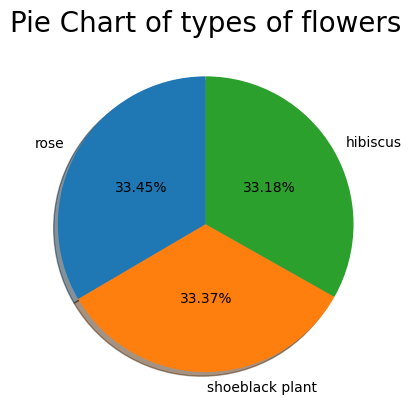

In [11]:
df['species'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90,pctdistance=0.50,shadow=True)
plt.ylabel('')
plt.title("Pie Chart of types of flowers",fontsize=20)
plt.show();

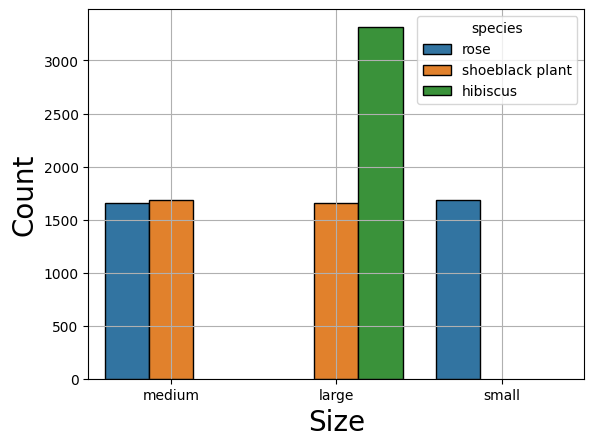

In [12]:
sns.countplot(x=df['size'],hue=df['species'],edgecolor='black')
plt.xlabel('Size',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.show()

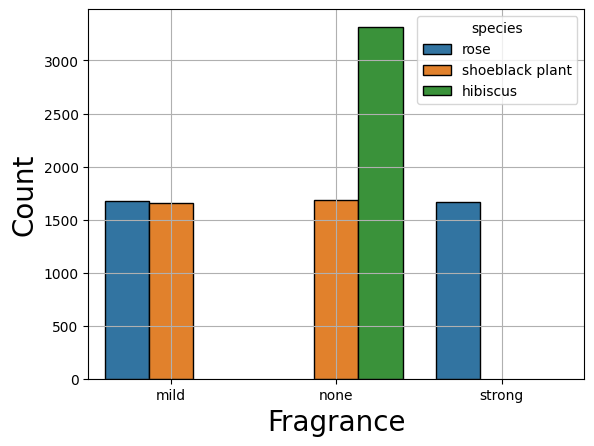

In [13]:
sns.countplot(x=df['fragrance'],hue=df['species'],edgecolor='black')
plt.xlabel('Fragrance',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.show()

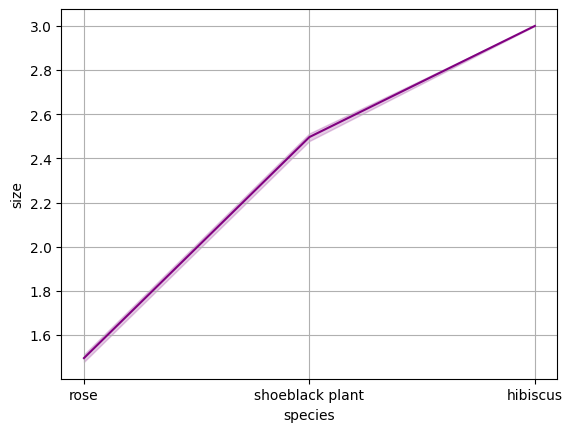

In [14]:
sns.lineplot(x=df["species"],y=final_df['size'],color='purple')
plt.grid(True)
plt.show()

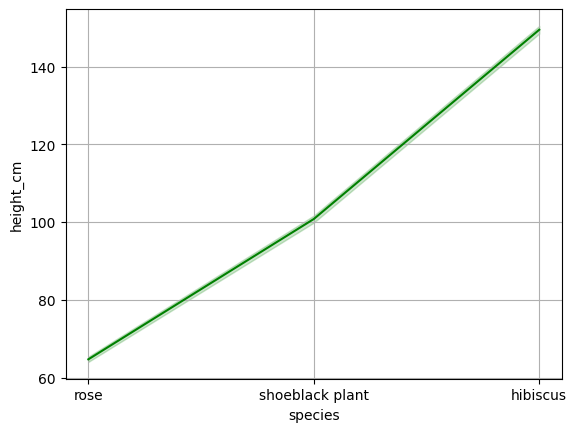

In [15]:
sns.lineplot(x="species",y='height_cm',data=df,color='green')
plt.grid(True)
plt.show()

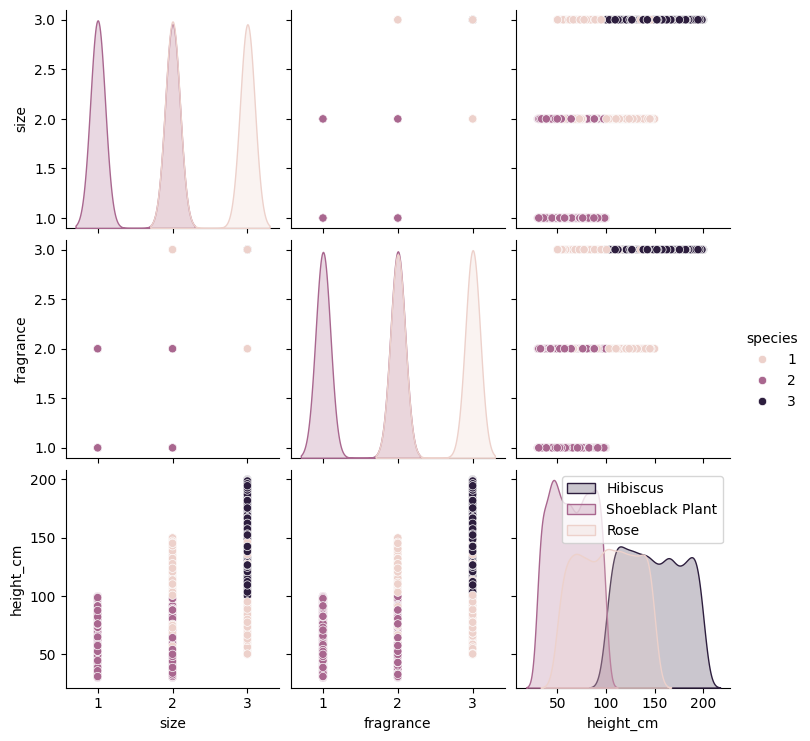

In [16]:
sns.pairplot(final_df,hue='species')
plt.legend(['Hibiscus','Shoeblack Plant','Rose'])
plt.show()

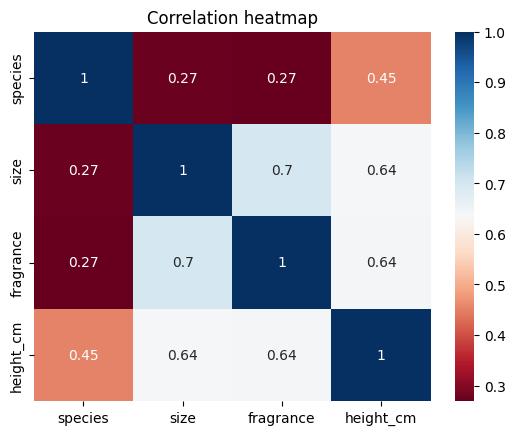

In [17]:
sns.heatmap(final_df.corr(),annot=True,cmap='RdBu')
plt.title("Correlation heatmap")
plt.show()

> #### The Correlation heatmap shows that species, size, and fragrance have positive correlation with Specie Type.

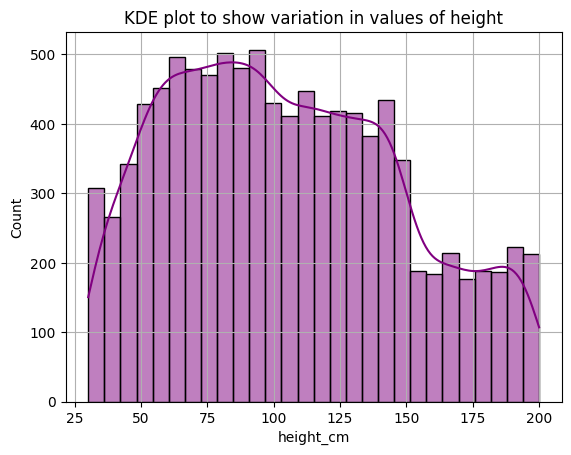

In [18]:
sns.histplot(x=final_df['height_cm'],kde=True,color='purple')
plt.title("KDE plot to show variation in values of height")
plt.grid(True)
plt.show()

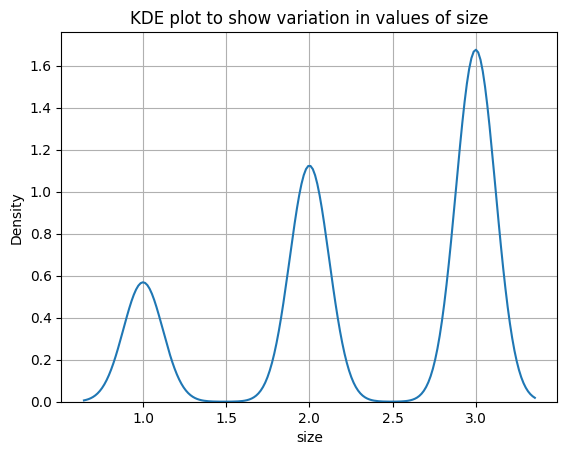

In [19]:
sns.kdeplot(x=final_df['size'])
plt.title("KDE plot to show variation in values of size")
plt.grid(True)
plt.show()

### Predictive Modelling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X=final_df[['size','fragrance','height_cm']]
Y=final_df['species']

#### Splitting the dataset into training and testing

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [23]:
print("Size of X_train: ",X_train.shape,'\n')
print("Size of Y_train: ",Y_train.shape,'\n')
print("Size of X_test: ",X_test.shape,'\n')
print("Size of Y_test: ",Y_test.shape,'\n')

Size of X_train:  (8000, 3) 

Size of Y_train:  (8000,) 

Size of X_test:  (2000, 3) 

Size of Y_test:  (2000,) 



In [24]:
Scaler=StandardScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)

### Using Support Vector Machine for Classification

In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

###### Hyperparameter Tuning

In [26]:
SVC=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['sigmoid'],'gamma':[0.1,1]}
Grid=GridSearchCV(SVC,param_grid=param_grid,cv=10)
Grid.fit(X_train,Y_train)
print("The best hyperparameters are -> ",Grid.best_params_,"\n")
print("The best cross validation score is -> ",Grid.best_score_)


The best hyperparameters are ->  {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'} 

The best cross validation score is ->  0.9103750000000002


In [27]:
best_model=Grid.best_estimator_

In [28]:
yhat=best_model.predict(X_test)

#### SVC Model Evaluation

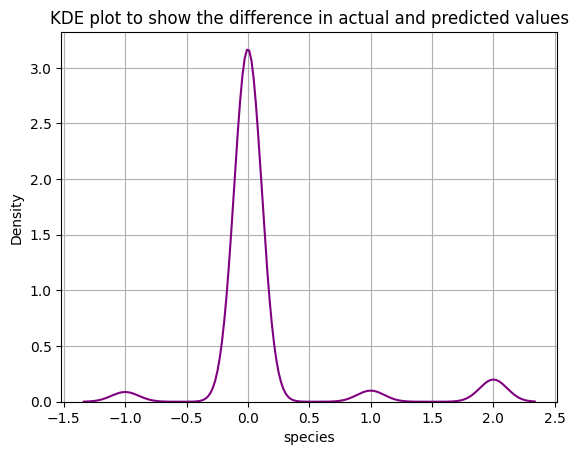

In [29]:
sns.kdeplot(yhat-Y_test,color='purple')
plt.title("KDE plot to show the difference in actual and predicted values")
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, yhat)
print("Accuracy score = ", accuracy)

Accuracy score =  0.8915


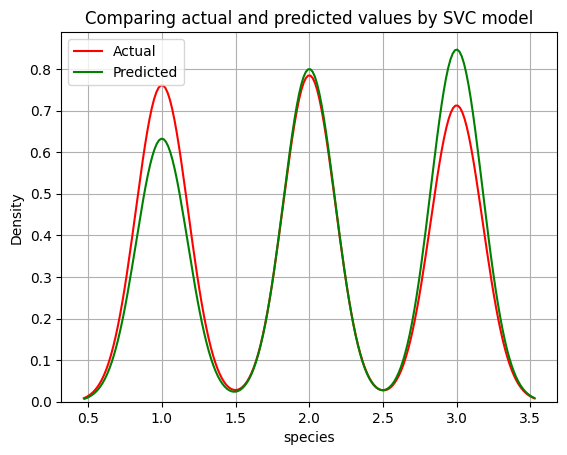

In [31]:
ax=sns.kdeplot(Y_test,color='red')
sns.kdeplot(yhat,color='green',ax=ax)
plt.legend(['Actual','Predicted'],loc='upper left')
plt.title('Comparing actual and predicted values by SVC model')
plt.grid(True)
plt.show()

> #### The accuracy of the model is decent. 

> #### Let's build some more classification models. 

### Using Multinomial Logistic Regression for Classification

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
LR=LogisticRegression(multi_class='multinomial')
LR

LogisticRegression(multi_class='multinomial')

###### Hyperparameter Tuning

In [34]:
param_grid2={'C':[0.01,0.1,1,10],'solver':['lbfgs','saga','newton-cg', 'sag']}
Grid=GridSearchCV(LR,param_grid=param_grid2,cv=10)
Grid.fit(X_train,Y_train)
print("The best hyperparameters are : ",Grid.best_params_ ,"\n")
print("The best cross validation score is : ",Grid.best_score_ ,"\n")

The best hyperparameters are :  {'C': 1, 'solver': 'lbfgs'} 

The best cross validation score is :  0.9121250000000002 



In [35]:
best_LR_model=Grid.best_estimator_

In [36]:
yhat2=best_LR_model.predict(X_test)

#### Logistic Regression Model Evaluation

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print("The accuracy for the Logistic regression is -> ",accuracy_score(Y_test,yhat2),' or ',accuracy_score(Y_test,yhat2)*100,'%')

The accuracy for the Logistic regression is ->  0.898  or  89.8 %


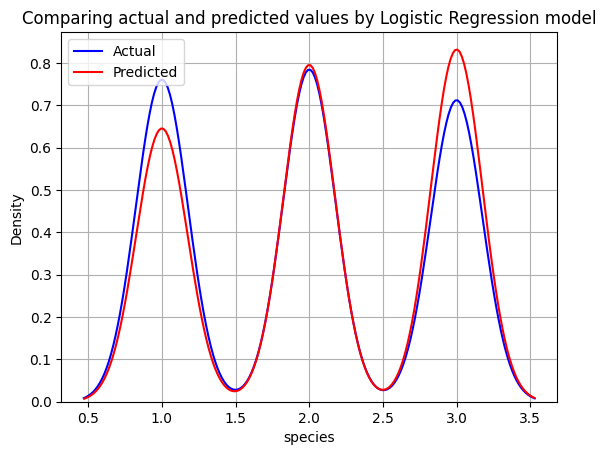

In [39]:
ax=sns.kdeplot(Y_test,color='blue')
sns.kdeplot(yhat2,color='red',ax=ax)
plt.legend(['Actual','Predicted'],loc='upper left')
plt.title('Comparing actual and predicted values by Logistic Regression model')
plt.grid(True)
plt.show()

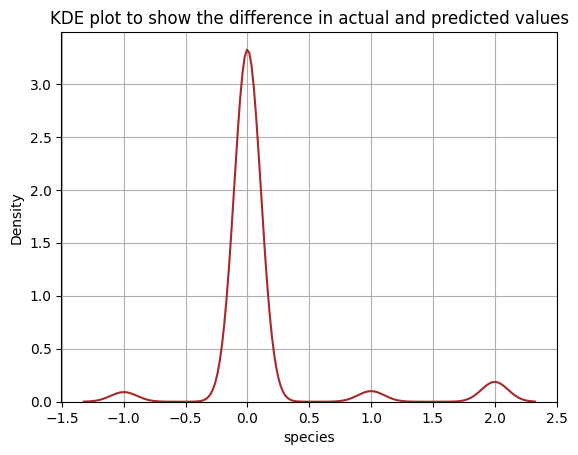

In [40]:
sns.kdeplot(yhat2-Y_test,color='brown')
plt.title('KDE plot to show the difference in actual and predicted values')
plt.grid(True)
plt.show()

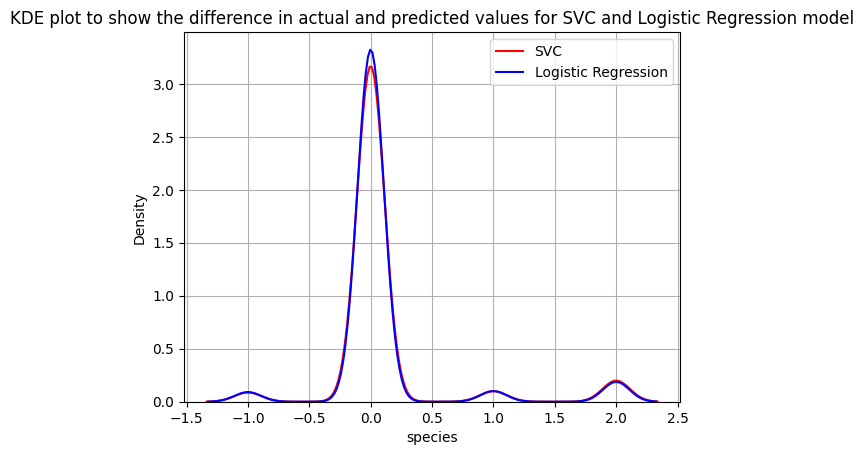

In [41]:
ax=sns.kdeplot(yhat-Y_test,color='red')
ax1=sns.kdeplot(yhat2-Y_test,ax=ax,color='blue')
plt.title('KDE plot to show the difference in actual and predicted values for SVC and Logistic Regression model')
plt.legend(['SVC','Logistic Regression'])
plt.grid(True)
ax1
plt.show()


#### We saw that the Logistic Regression model is bit more accurate than SVC model. Let's build a KNN model too.

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
import numpy as np
from sklearn import metrics

###### Hyperparameter Tuning

In [44]:
ks=200
mean_acc=np.zeros((ks-1))
for n in range(1,ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    yhat4=neigh.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(Y_test,yhat4)
mean_acc

array([0.8775, 0.8555, 0.885 , 0.879 , 0.897 , 0.886 , 0.8965, 0.892 ,
       0.8965, 0.892 , 0.898 , 0.8955, 0.9   , 0.899 , 0.9015, 0.8975,
       0.9015, 0.9   , 0.902 , 0.8995, 0.902 , 0.901 , 0.899 , 0.8985,
       0.9   , 0.9   , 0.9035, 0.9025, 0.9025, 0.905 , 0.9065, 0.9075,
       0.9025, 0.9035, 0.9035, 0.9045, 0.903 , 0.9015, 0.9025, 0.9005,
       0.901 , 0.902 , 0.9015, 0.901 , 0.901 , 0.9015, 0.9015, 0.9015,
       0.9045, 0.9055, 0.9055, 0.905 , 0.906 , 0.906 , 0.906 , 0.9065,
       0.9055, 0.9065, 0.905 , 0.9055, 0.9035, 0.9035, 0.9035, 0.9035,
       0.9035, 0.9025, 0.9025, 0.9025, 0.904 , 0.9035, 0.9035, 0.9025,
       0.903 , 0.903 , 0.904 , 0.903 , 0.9035, 0.9035, 0.904 , 0.9045,
       0.9035, 0.9035, 0.9035, 0.903 , 0.9035, 0.9035, 0.9035, 0.9035,
       0.9025, 0.9025, 0.903 , 0.903 , 0.9035, 0.904 , 0.903 , 0.9015,
       0.902 , 0.901 , 0.902 , 0.9025, 0.903 , 0.9025, 0.902 , 0.9025,
       0.902 , 0.902 , 0.9025, 0.9025, 0.9025, 0.902 , 0.9015, 0.9015,
      

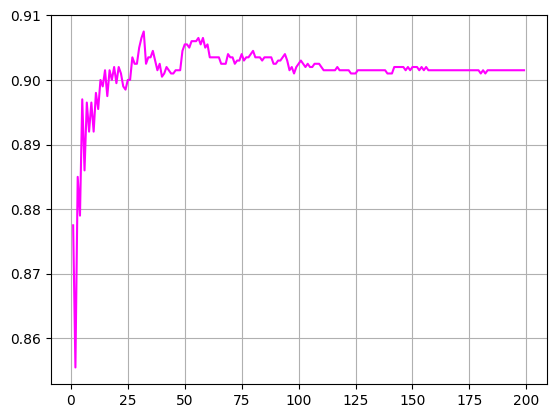

In [45]:
plt.plot(range(1,ks),mean_acc, color='magenta')
plt.grid(True)
plt.show()

In [46]:
index_of_max = np.argmax(mean_acc)
print(index_of_max)

31


In [47]:
mean_acc[31]

0.9075

In [48]:
k=32
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train,Y_train)
yhat3=neigh.predict(X_test)
accuracy_score(yhat3,Y_test)

0.9075

#### KNN Model Evaluation

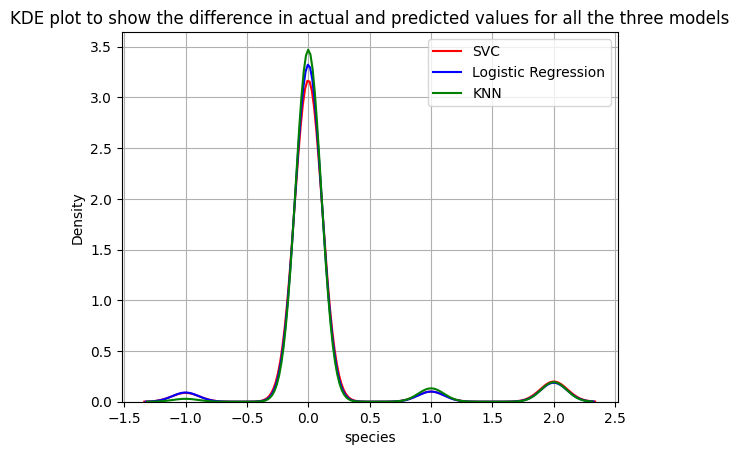

In [49]:
ax=sns.kdeplot(yhat-Y_test,color='red')
ax1=sns.kdeplot(yhat2-Y_test,ax=ax,color='blue')
sns.kdeplot(yhat3-Y_test,color='green',ax=ax1)
plt.title('KDE plot to show the difference in actual and predicted values for all the three models')
plt.legend(['SVC','Logistic Regression','KNN'])
plt.grid(True)
plt.show()

> #### We saw that the K Nearest Neighbors Model performs the best in all three.

###### Creating a Data Frame for actual values and predicted values by all the three models.

In [50]:
predicteddf=pd.DataFrame({'Actual Values':Y_test,'SVC predictions':yhat,'Logistic Regression predictions':yhat2,'KNN predictions':yhat3})
predicteddf.replace({3:'hibiscus',2:'rose',1:'shoeblack plant'},inplace=True)
predicteddf.tail(60)

,Actual Values,SVC predictions,Logistic Regression predictions,KNN predictions
4266,shoeblack plant,shoeblack plant,shoeblack plant,shoeblack plant
4756,hibiscus,hibiscus,hibiscus,hibiscus
5485,hibiscus,hibiscus,hibiscus,hibiscus
2849,rose,rose,rose,rose
4654,rose,rose,rose,rose
1235,shoeblack plant,shoeblack plant,shoeblack plant,shoeblack plant
2155,rose,rose,rose,rose
799,shoeblack plant,shoeblack plant,shoeblack plant,shoeblack plant
7425,shoeblack plant,hibiscus,hibiscus,hibiscus
4461,shoeblack plant,shoeblack plant,shoeblack plant,shoeblack plant


In [51]:
predicteddf.shape

(2000, 4)

In [52]:
(predicteddf['Actual Values']==predicteddf['KNN predictions']).value_counts()

True     1815
False     185
Name: count, dtype: int64

In [53]:
(predicteddf['Actual Values']==predicteddf['Logistic Regression predictions']).value_counts()    

True     1796
False     204
Name: count, dtype: int64

In [54]:
(predicteddf['Actual Values']==predicteddf['SVC predictions']).value_counts()

True     1783
False     217
Name: count, dtype: int64

###### From the above cells, we can say that  the K Nearest Neighbors Model is the most accurate.

# Author

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)